In [13]:
import matplotlib.pyplot as plt 
import networkx as nx 
import numpy as np 
import itertools as it

In [14]:
m = n = 6

G = nx.hexagonal_lattice_graph(m, n, periodic=0)
pos = nx.get_node_attributes(G, 'pos')
labels = {}

for i, node in enumerate(G.nodes):
    labels[node] = i

In [15]:
color = []
R_Group = []
B_Group = []

for node in G.nodes:
    i, j = node
    if i % 2 == 0:
        if j % 2 == 0:
            color.append('b')
            B_Group.append(node)
        else:
            color.append('r')
            R_Group.append(node)
    else:
        if j % 2 == 0:
            color.append('r')
            R_Group.append(node)
        else:
            color.append('b')
            B_Group.append(node)

C:\Users\cosmi\AppData\Local\Temp/ipykernel_3484/2234256919.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(-0.9975, 10.497499999999999, -1.182124676165759, 12.440454925363461)

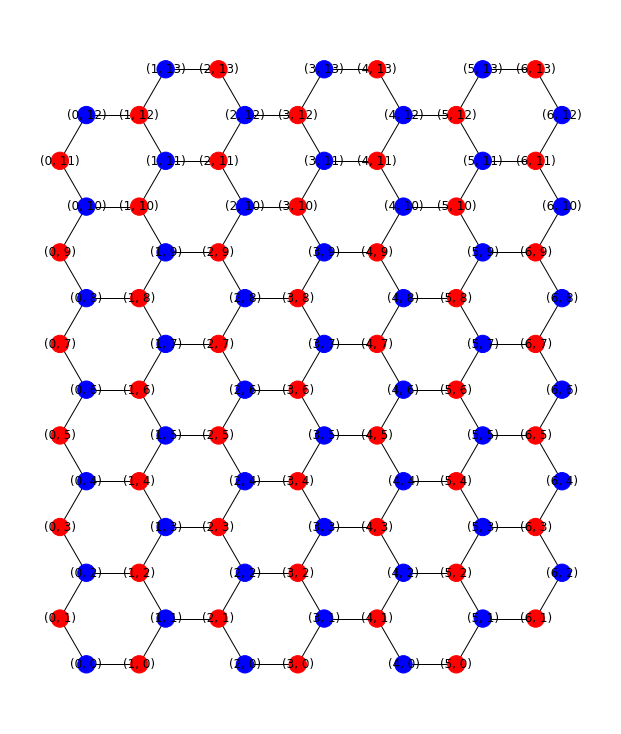

In [16]:
plt.figure(figsize=(10,10))
nx.draw(G, pos=pos, with_labels=True, node_color=color[:])
#nx.draw(G, pos=pos, node_color=color[:])
plt.axis('scaled');
#nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.axis('scaled')
plt.tight_layout()
plt.axis("off")

In [17]:
NN_1 = nx.Graph()
NN_2 = nx.Graph()

pos1 = {}
pos2 = {}

def NN_linking(model, group):
    for node in group:
        i, j = node
        
        rules = [(i + 1, j + 1), (i, j + 2), (i - 1, j + 1), 
                (i - 1, j - 1), (i + 1, j - 1), (i, j - 2)]
        
        for rule in rules:
            if rule in group:
                model.add_edge(node, rule)

NN_linking(NN_1, B_Group)
NN_linking(NN_2, R_Group)

for node in B_Group:
    pos1[node] = pos[node]
    
for node in R_Group:
    pos2[node] = pos[node]

C:\Users\cosmi\AppData\Local\Temp/ipykernel_3484/25082240.py:7: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


(-0.9975, 10.497499999999999, -1.182124676165759, 12.440454925363461)

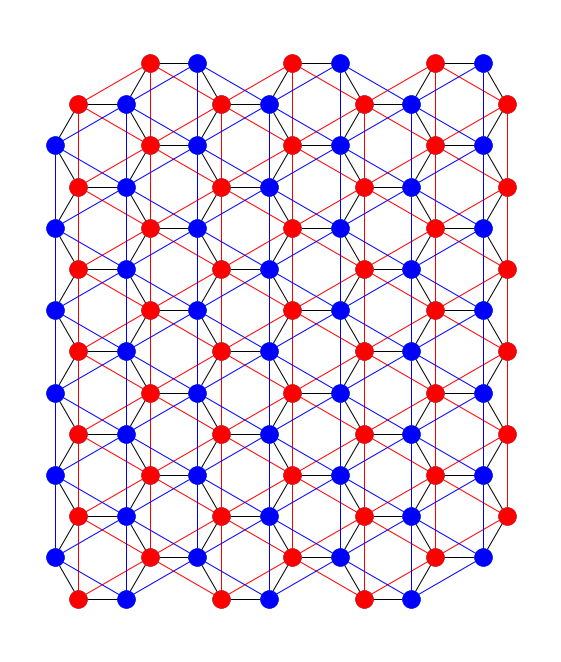

In [18]:
plt.figure(figsize=(16,9))
nx.draw(G, pos=pos)
nx.draw(NN_1, pos=pos1, edge_color='r', node_color='r')
nx.draw(NN_2, pos=pos2, edge_color='b', node_color='b')
#nx.draw_networkx_labels(G, pos=pos, labels=labels)
plt.axis('scaled');
plt.axis("off")